## Assignment 6
### Lab 2/3 for Elective Lab ODE's and FFT's
Katie Robinson

### [Problem Experiment](#prob_experiment) 

Lorenz’ results are based on the following values of the physical parameters taken from Saltzman’s paper (Saltzman, 1962): $$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ 
As you will see in [Section stability](#sec_stability), there is a *critical value of the parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of $\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.

-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

1.  Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.

2.  One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.

3.  Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?




In [3]:
# copying the integrator class for the Lorenz equations: (from lab 6)
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np




class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

In [69]:
# copying the plotting function from lab6
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

def plot_3d(ax,xvals,vals,zvals,color):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,color)
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

#### Test #1: Fixing the initial conditions at $(5,5,5)$ and varing $\rho$ between $0$ and $100$.

I will run the code 100 times for different values of $\rho$ between $0$ and $100$ and plot the final position of the solution at t$_{end}$.

In [37]:
# run the code 100 times for rho = 0 to 100. Save the x,y,z coordinates of the solution at
# t_end in a list.
timevars=dict(tstart=0,tend=27,dt=0.01)
initvars=dict(x=5,y=5,z=5)
x_final = []
y_final = []
z_final = []
pvals = []
for p in range(0,101):
    uservars=dict(sigma=10,beta=2.6666,rho=p)
    params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
    theSolver = Integ61('lorenz.yaml',**params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    pvals.append(p)
    x_final.append(xvals[-1])
    y_final.append(yvals[-1])
    z_final.append(zvals[-1])
    

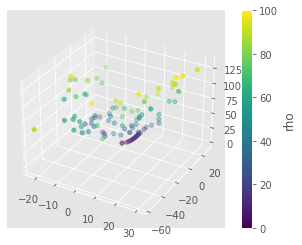

In [60]:
fig = plt.figure()
plt.rcParams['axes.grid'] = False
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(x_final, y_final, z_final, cmap=plt.cm.viridis, c=pvals) 
fig.colorbar(cax,label='rho')

In the plot above, I tested how to final solution changes when $\rho$ is varied between 0 and 100. The colorbar on the right represents the value of $\rho$ for each point on the scatter plot. As you can see, the position of the solution at t$_{end}$ is highly variable depending on the initial condition for $\rho$, even when the initial coordinates (x,yz) are fixed.

#### Test 2: Fix $\rho=28$, and vary the initial conditions; for example, try $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$, $(8.5,8.5,27)$, etc.

In [144]:
# set 5 different sets of initial conditions
timevars=dict(tstart=0,tend=27,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars1=dict(x=5,y=5,z=5)
initvars2=dict(x=0,y=0,z=0)
initvars3=dict(x=6,y=6,z=5)
initvars4=dict(x=1,y=1,z=10)
initvars5=dict(x=0.1,y=0.1,z=0.1)
initvars6=dict(x=0.1,y=0.1,z=0.2)
params1=dict(timevars=timevars,uservars=uservars,initvars=initvars1)
params2=dict(timevars=timevars,uservars=uservars,initvars=initvars2)
params3=dict(timevars=timevars,uservars=uservars,initvars=initvars3)
params4=dict(timevars=timevars,uservars=uservars,initvars=initvars4)
params5=dict(timevars=timevars,uservars=uservars,initvars=initvars5)
params6=dict(timevars=timevars,uservars=uservars,initvars=initvars6)

theSolver1 = Integ61('lorenz.yaml',**params1)
theSolver2 = Integ61('lorenz.yaml',**params2)
theSolver3 = Integ61('lorenz.yaml',**params3)
theSolver4 = Integ61('lorenz.yaml',**params4)
theSolver5 = Integ61('lorenz.yaml',**params5)
theSolver6 = Integ61('lorenz.yaml',**params6)
timevals, coords1, errorlist = theSolver1.timeloop5fixed()
timevals, coords2, errorlist = theSolver2.timeloop5fixed()
timevals, coords3, errorlist = theSolver3.timeloop5fixed()
timevals, coords4, errorlist = theSolver4.timeloop5fixed()
timevals, coords5, errorlist = theSolver5.timeloop5fixed()
timevals, coords6, errorlist = theSolver6.timeloop5fixed()

xvals1,yvals1,zvals1=coords1[:,0],coords1[:,1],coords1[:,2]
xvals2,yvals2,zvals2=coords2[:,0],coords2[:,1],coords2[:,2]
xvals3,yvals3,zvals3=coords3[:,0],coords3[:,1],coords3[:,2]
xvals4,yvals4,zvals4=coords4[:,0],coords4[:,1],coords4[:,2]
xvals5,yvals5,zvals5=coords5[:,0],coords5[:,1],coords5[:,2]
xvals6,yvals6,zvals6=coords6[:,0],coords6[:,1],coords6[:,2]

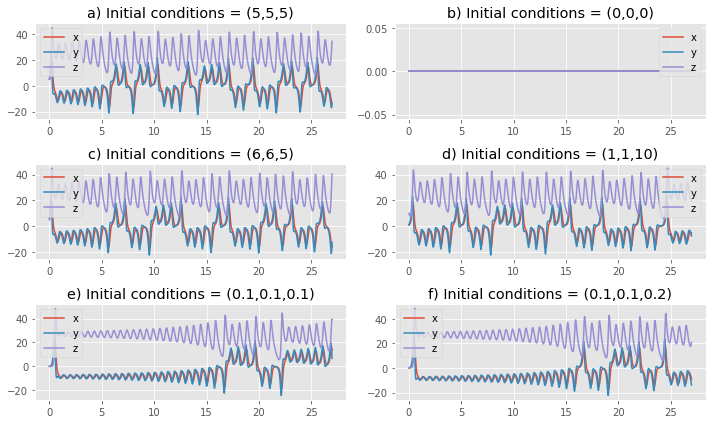

In [147]:
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(timevals,xvals1,label='x')
plt.plot(timevals,yvals1,label='y')
plt.plot(timevals,zvals1,label='z')
plt.title('a) Initial conditions = (5,5,5)')
plt.legend()
plt.subplot(3,2,2)
plt.plot(timevals,xvals2,label='x')
plt.plot(timevals,yvals2,label='y')
plt.plot(timevals,zvals2,label='z')
plt.title('b) Initial conditions = (0,0,0)')
plt.legend()
plt.subplot(3,2,3)
plt.plot(timevals,xvals3,label='x')
plt.plot(timevals,yvals3,label='y')
plt.plot(timevals,zvals3,label='z')
plt.title('c) Initial conditions = (6,6,5)')
plt.legend()
plt.subplot(3,2,4)
plt.plot(timevals,xvals4,label='x')
plt.plot(timevals,yvals4,label='y')
plt.plot(timevals,zvals4,label='z')
plt.title('d) Initial conditions = (1,1,10)')
plt.legend()
plt.subplot(3,2,5)
plt.plot(timevals,xvals5,label='x')
plt.plot(timevals,yvals5,label='y')
plt.plot(timevals,zvals5,label='z')
plt.title('e) Initial conditions = (0.1,0.1,0.1)')
plt.legend()
plt.subplot(3,2,6)
plt.plot(timevals,xvals6,label='x')
plt.plot(timevals,yvals6,label='y')
plt.plot(timevals,zvals6,label='z')
plt.title('f) Initial conditions = (0.1,0.1,0.2)')
plt.legend()
plt.tight_layout()

The plot above shows once again that changing the initial conditions (even slightly: ie. plot e vs plot f or plot a vs c) can significantly change the trajectory of the solution. When two solutions start out with initial conditions that are close to one another, they intially follow a similar trajectory to one another, but diverge to different final positions if the simulation is allowed to evolve for a long enough time. Plot b shows a steady state for the intial condition (x,y,z) = (0,0,0), meaning that the state does not change ($\frac{dx}{dt} = 0  \quad\  \mathrm{and}\ \quad \frac{dy}{dt} = 0 \quad \ \mathrm{and}\ \quad \frac{dz}{dt} = 0$).

#### Test 3: How long does it take two different trajectories with similar initial conditions to diverge from one another?

[Text(0.5, 0.92, 'Fig A \n Red line starting point = (0.1,0.1,0.1) \n Black line starting point = (0.1,0.1,0.2)')]

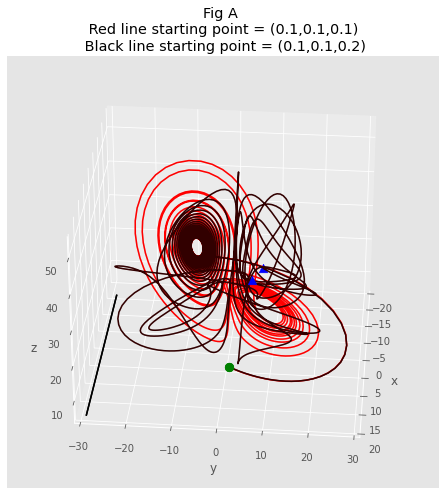

In [149]:
#Plot to compare the trajectories for intial (x,y,z) = (0.1,0.1,0.1) 
# and (0,2,0.2,0.2)

fig = plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals5,yvals5,zvals5,'r')
ax=plot_3d(ax,xvals6,yvals6,zvals6,'k')
#out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
ax.set(title='Fig A \n Red line starting point = (0.1,0.1,0.1) \n Black line starting point = (0.1,0.1,0.2)')

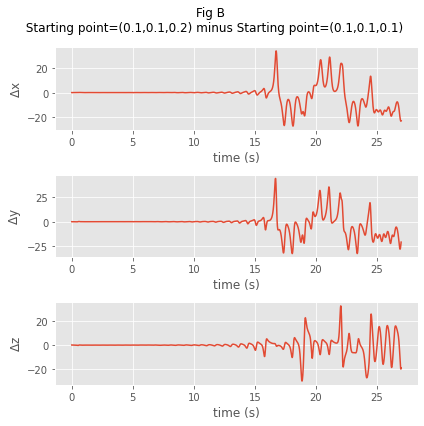

In [170]:
#Calculate the difference between the x,y,z position for (x,y,z) = (0.1,0.1,0.1) 
# and (0,2,0.2,0.2)

difference_x = xvals6 - xvals5
difference_y = yvals6 - yvals5
difference_z = zvals6 - zvals5

plt.figure(figsize=(6,6))
plt.suptitle('Fig B \n Starting point=(0.1,0.1,0.2) minus Starting point=(0.1,0.1,0.1)')
plt.subplot(3,1,1)
plt.plot(timevals,difference_x)
plt.xlabel('time (s)')
plt.ylabel('$\Delta$x')
plt.subplot(3,1,2)
plt.xlabel('time (s)')
plt.ylabel('$\Delta$y')
plt.plot(timevals,difference_y)
plt.subplot(3,1,3)
plt.xlabel('time (s)')
plt.ylabel('$\Delta$z')
plt.plot(timevals,difference_z)
plt.tight_layout()


To examine how two trajectories that start at very similar initial positions change over time, I plotted two trajectories with intial positions = (0.1,0.1,0.1) and (0.1,0.1,0.2) (Fig A). The green circle in Fig A shows that starting positions of the two trajectories which are nearly identical. The red and black lines trace out the paths of the trajectories through time, showing that as the simulation evolves the two trajectories begin to occupy very different paths and diverge from one another and cross paths again at seemingly random intervals. In Fig B I plotted the difference between the x, y, and z positions of the two trajectories through time. The 3 subplots in Fig B show the differences between the two trajectories for each coordinate, and indicate that the two trajectories follow very similar paths until around t=15seconds, after which the differences between the two trajectories oscillate between ~ $\pm$20.

The three tests conducted above show the theory of 'the butterfly effect' in action. In other words, even tiny perturbations to the initial conditions of a system can induce big changes on the final state of the system, as long as the system is allowed to evolve for a long enough time. 

This experiment shows that processes such as thermal convection are also 'chaotic', meaning fluid heated from the bottom will be in a state of unpredictable disorder due to turbulence. The Lorenz equations for convection are
$$
\begin{aligned}
  \frac{dx}{dt} &=& \sigma(y-x)  \\
  \frac{dy}{dt} &=& \rho x-y-xz  \\
  \frac{dz}{dt} &=& xy-\beta z 
\end{aligned}
$$
where $\sigma$, $\rho$
and $\beta$ are parameters, and (x,y,z) represent something real about the system (x: the direction and magnitude of the convective motion, y: the temperature gradient between rising and falling currents, and z: the distortion of the temperature gradients relative to linear). We can see from the solutions to these equations that small perturbations in the inital conditions produce large differences in the final state of the system. This concept was also experimentally proven by Libchaber (1982)*, who studied convection in a sample of helium by warming the fluid from the bottom and observing the resulting complex and unpredictable behaviour of the system. 



\* Libchaber, A. (1982). Convection and turbulence in liquid helium I. Physica B+ C, 109, 1583-1589.

### **[Problem eigenvalues:](prob_eigenvalues)**

Remember from Lab \#3 that the eigenvalues of a matrix, $A$, are given by the roots of the characteristic equation, $det(A-\lambda I)=0$.  Determine the characteristic equation of the matrix in [eq:lorenz_linear_matrix](#eq:lorenz_linear_matrix), and show that the eigenvalues of the linearized problem are

**eq_eigen0**
<div id="eq_eigen0"></div>
\begin{equation}
\label{eq:eig0}
\lambda_1 = -\beta, \quad \mathrm{and} \quad \lambda_2, \lambda_3 =
\frac{1}{2} \left( -\sigma - 1 \pm  \sqrt{(\sigma-1)^2 + 4 \sigma \rho}
\right).  
\end{equation}


When $\rho>1$, the same linearization process can be applied at the remaining two stationary points, which have eigenvalues that satisfy another characteristic equation:

**eq_eigen01**
<div id="eq_eigen01"></div>
\begin{equation}
\label{eq:eig12}
\lambda^3+(\sigma+\beta +1)\lambda^2+(\rho+\sigma)\beta \lambda+2\sigma  \beta(\rho-1)=0.
\end{equation}

To prove that these are the eigenvalues for the lorenz linear matrix, I calculated the characteristic equation and got $$det(A-\lambda I)=0 $$
$$ 0 = -\sigma\beta(\rho-1)+\lambda(-\sigma(1+\beta-\rho)-\beta)+\lambda^2(-\sigma-\beta-1)-\lambda^3$$.

Next I defined a function that can calculate the result of this characteristic polynomial for some value of $\lambda$. The result (shown below) is that for \begin{equation}
\label{eq:eig0}
\lambda_1 = -\beta, \quad \mathrm{and} \quad \lambda_2, \lambda_3 =
\frac{1}{2} \left( -\sigma - 1 \pm  \sqrt{(\sigma-1)^2 + 4 \sigma \rho}
\right),  
\end{equation}
the characteristic equation = 0. This proves that $\lambda_1$, $\lambda_2$, and $\lambda_3$ are the eigenvalues for the matrix.

In [214]:
def characteristic_eq(eigenval):
    sigma = 10
    beta = (8/3)
    rho = 28
    result = (-sigma*beta)+(sigma*rho*beta)-(sigma*eigenval)-(sigma*beta*eigenval)-(beta*eigenval)+(sigma*rho*eigenval)-(sigma*eigenval**2)-(eigenval**2)-(beta*eigenval**2)-(eigenval**3)
    return result

In [222]:
sigma = 10
beta = (8/3)
rho = 28
eigenval_1 = -beta
eigenval_2 = (0.5)*(-sigma-1+np.sqrt((sigma-1)**2+4*sigma*rho))
eigenval_3 = (0.5)*(-sigma-1-np.sqrt((sigma-1)**2+4*sigma*rho))

print(characteristic_eq(eigenval_1))
print(characteristic_eq(eigenval_2))
print(characteristic_eq(eigenval_3))

-5.684341886080802e-14
-9.094947017729282e-13
0.0


### **[Problem Stability](#prob_stability)** 

Based on the analytical results from this section, you can now go back to your results from [Problem Experiment](#prob_experiment) and look at them in a new light. Write a short summary of your results (including a few plots or sketches), describing how the solution changes with $\rho$ in terms of the existence and stability of the stationary points.

There have already been hints at problems with the linear stability analysis. One difficulty that hasn’t been mentioned yet is that for values of $\rho>\rho^\ast$, the problem has oscillatory solutions, which are unstable. *Linear theory does not reveal what happens when these oscillations become large!* In order to study more closely the
long-time behaviour of the solution, we must turn to numerical integration (in fact, all of the plots you produced in
Problem [lab6:prob:experiment] were generated using a numerical code).



In problem steady-states we found that there are three stationary points when p > 1. They are:
- $(0,0,0)$,

-   $(\sqrt{\beta(\rho-1)},\sqrt{\beta(\rho -1)},\rho -1)$, and

-   $(-\sqrt{\beta (\rho -1)},-\sqrt{\beta(\rho-1)},\rho-1)$.